In [1]:
from grover_cirq import simulate_grover_qc_list
from grover_num_list_cirq import grover_num_list, simple_search_grover
from quantum_operation import QuantumOperation

from qiskit.tools.visualization import plot_histogram

In [2]:
simple_winner = [4]
simple_nqubits = 3
simple_block_diagram = True

In [3]:
simple_qc = simple_search_grover(simple_winner, simple_nqubits, block_diagram=simple_block_diagram)

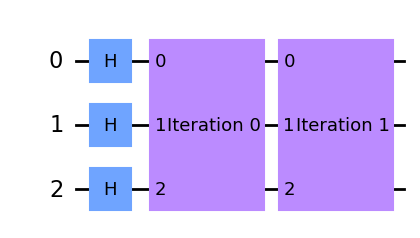

In [4]:
simple_qc.draw('mpl')

In [5]:
simulation = simulate_grover_qc_list([simple_qc], all_simulations=True)[0]

In [6]:
print(simulation)

(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001F97ED76320>, {'100': 969, '011': 12, '001': 10, '000': 7, '101': 7, '110': 5, '111': 8, '010': 6})


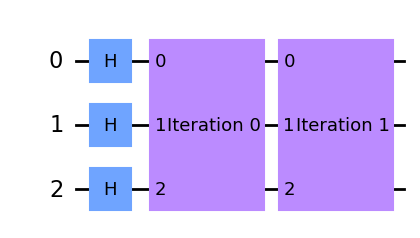

In [7]:
simulation[0].draw('mpl')

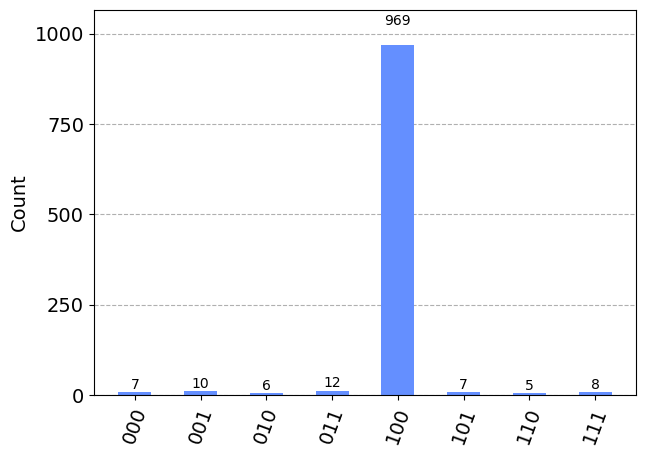

In [8]:
plot_histogram(simulation[1])

In [9]:
qc_list, index = grover_num_list([1,0,3,1,1], 5, winner_list=[1], solutions=None, block_diagram=True)
circuits = simulate_grover_qc_list(qc_list, circuit_index = index, min_percent=10,sum_percent=70)

for qc in circuits:
    print(qc[0].name)
    print(qc[0].draw())
    print(qc[1])
    print()

Grover 0
   ┌───┐┌─────────────────┐
0: ┤ H ├┤0                ├
   ├───┤│                 │
1: ┤ H ├┤1                ├
   ├───┤│                 │
2: ┤ H ├┤2                ├
   └───┘│  Num_List_Query │
3: ─────┤3                ├
        │                 │
4: ─────┤4                ├
        │                 │
5: ─────┤5                ├
        └─────────────────┘
{'100': 309, '000': 296, '010': 28, '011': 266, '111': 39, '001': 31, '101': 30, '110': 25}

Grover 1
   ┌───┐┌─────────────────┐┌─────────────────┐
0: ┤ H ├┤0                ├┤0                ├
   ├───┤│                 ││                 │
1: ┤ H ├┤1                ├┤1                ├
   ├───┤│                 ││                 │
2: ┤ H ├┤2                ├┤2                ├
   └───┘│  Num_List_Query ││  Num_List_Query │
3: ─────┤3                ├┤3                ├
        │                 ││                 │
4: ─────┤4                ├┤4                ├
        │                 ││                 │
5: ─────

In [10]:
op = QuantumOperation()
op.set_circuit(qc_list[0])

In [11]:
op.run_circuit()

{'circuit_Name': 'Grover 0',
 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1f9109fce50>,
 'count': {'011': 281,
  '000': 288,
  '100': 286,
  '111': 31,
  '101': 35,
  '110': 26,
  '010': 46,
  '001': 31},
 'time': 0.008977174758911133}

In [12]:
print(op.get_state_vector())

Statevector([-5.30330086e-01-2.05664563e-16j,
              1.76776695e-01-5.41222535e-17j,
              1.76776695e-01-5.41222535e-17j,
             -5.30330086e-01-2.92260169e-16j,
             -5.30330086e-01-2.05664563e-16j,
              1.76776695e-01+7.57711549e-17j,
              1.76776695e-01+3.24733521e-17j,
              1.76776695e-01+1.40717859e-16j,
             -1.06049031e-32+3.24733521e-17j,
              3.97683867e-33-1.08244507e-17j,
              3.97683867e-33-1.08244507e-17j,
              1.06049031e-32-1.08244507e-17j,
              5.30245156e-33-1.08244507e-17j,
              9.27929023e-33-1.08244507e-17j,
              9.27929023e-33-1.08244507e-17j,
              1.06049031e-32-1.08244507e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.000

In [13]:
print(op.get_unitary())

Operator([[-0.53 -0.j, -0.177-0.j, -0.177-0.j, ...,  0.   +0.j,
            0.   +0.j,  0.   +0.j],
          [ 0.177-0.j, -0.177-0.j,  0.53 +0.j, ...,  0.   +0.j,
            0.   +0.j,  0.   +0.j],
          [ 0.177-0.j,  0.53 +0.j, -0.177-0.j, ...,  0.   +0.j,
            0.   +0.j,  0.   +0.j],
          ...,
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j, ...,  0.354+0.j,
           -0.354-0.j,  0.354+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j, ..., -0.354-0.j,
            0.354+0.j,  0.354+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j, ...,  0.354+0.j,
            0.354+0.j, -0.354-0.j]],
         input_dims=(2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2))


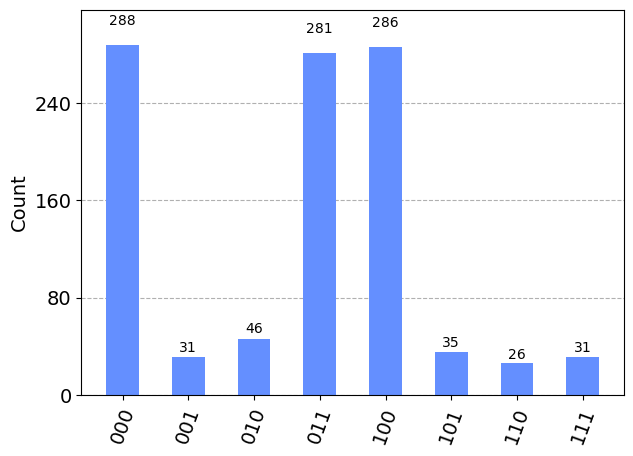

In [14]:
plot_histogram(op.get_result_count())